In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn. preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf
import numpy as np
import pandas
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.manifold import TSNE, Isomap
from math import sqrt
import warnings
import sys
import math

warnings.filterwarnings('ignore')

sys.path.append("..")

In [5]:
data_cl = pd.read_csv(f'../data/csgo_taskv2.csv')
data_rg = pd.read_csv(f'../data/trip_duration_taskv2.csv')

Data_CL

In [6]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        122410 non-null  int64  
 1   time_left         122410 non-null  float64
 2   ct_score          122410 non-null  int64  
 3   t_score           122410 non-null  int64  
 4   map               122410 non-null  object 
 5   bomb_planted      122410 non-null  bool   
 6   ct_health         122410 non-null  int64  
 7   t_health          122410 non-null  int64  
 8   ct_armor          122410 non-null  int64  
 9   t_armor           122410 non-null  int64  
 10  ct_money          122410 non-null  int64  
 11  t_money           122410 non-null  int64  
 12  ct_helmets        122410 non-null  int64  
 13  t_helmets         122410 non-null  int64  
 14  ct_defuse_kits    122410 non-null  int64  
 15  ct_players_alive  122410 non-null  int64  
 16  t_players_alive   12

In [7]:
data_cl = data_cl.drop(['map'], axis=1)

In [8]:
data_cl.isna().sum()

Unnamed: 0          0
time_left           0
ct_score            0
t_score             0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [9]:
data_major_true = data_cl[data_cl['bomb_planted'] == True]
data_major_false = data_cl[data_cl['bomb_planted'] == False]

data_major_false_undersampled = data_major_false.sample(len(data_major_true))
data_cl = pd.concat([data_major_false_undersampled, data_major_true], axis = 0)

y_cl = data_cl['bomb_planted']
for unique in y_cl.unique():
    print(unique, y_cl.loc[y_cl == unique].count())

False 13684
True 13684


In [10]:
x_cl = data_cl.drop(['bomb_planted'], axis=1)

In [11]:
x_train_cl, x_test_cl, y_train_cl, y_test_cl = train_test_split(x_cl, y_cl, test_size=0.3)

Data_RG

In [12]:
data_rg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         729322 non-null  int64  
 1   id                 729322 non-null  object 
 2   vendor_id          729322 non-null  int64  
 3   passenger_count    729322 non-null  int64  
 4   pickup_longitude   729322 non-null  float64
 5   pickup_latitude    727475 non-null  float64
 6   dropoff_longitude  729322 non-null  float64
 7   dropoff_latitude   729322 non-null  float64
 8   trip_duration      729322 non-null  int64  
 9   pickup_datetime    729322 non-null  object 
 10  dropoff_datetime   729322 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 61.2+ MB


In [13]:
data_rg.isna().sum()

Unnamed: 0              0
id                      0
vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude      1847
dropoff_longitude       0
dropoff_latitude        0
trip_duration           0
pickup_datetime         0
dropoff_datetime        0
dtype: int64

In [14]:
mean_r = -0.0008561123804995453
for i in range(len(data_rg['pickup_latitude'])):
    if math.isnan(data_rg['pickup_latitude'].loc[data_rg.index[i]]):
        data_rg['pickup_latitude'].loc[data_rg.index[i]] = data_rg['dropoff_latitude'].loc[data_rg.index[i]] + mean_r
data_rg.isna().sum()

Unnamed: 0           0
id                   0
vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
pickup_datetime      0
dropoff_datetime     0
dtype: int64

In [15]:
data_rg = data_rg.drop(['id'], axis=1)
data_rg = data_rg.drop(['pickup_datetime'], axis=1)
data_rg = data_rg.drop(['dropoff_datetime'], axis=1)

In [16]:
y_rg = data_rg['trip_duration']
x_rg = data_rg.drop(['trip_duration'], axis=1)

In [17]:
x_rg = x_rg[:10000]
y_rg = y_rg[:10000]

In [18]:
x_train_rg, x_test_rg, y_train_rg, y_test_rg = train_test_split(x_rg, y_rg, test_size=0.3)

## Bagging

In [19]:
def Errors(y_test, y_predict):
    MAE = mean_absolute_error(y_test, y_predict)
    MSE = mean_squared_error(y_test, y_predict)
    RMSE = sqrt(mean_squared_error(y_test, y_predict))
    MAPE = sqrt(mean_absolute_percentage_error(y_test, y_predict))
    R2 = r2_score(y_test, y_predict)

    print('MAE: ', MAE,'MSE: ', MSE, 'RMSE: ', RMSE, 'MAPE: ', MAPE, 'R2: ', R2) 

In [20]:
#Classifier
def test_cl(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [21]:
test_cl(x_cl, y_cl)

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      5420
        True       0.97      0.99      0.98      5528

    accuracy                           0.98     10948
   macro avg       0.98      0.98      0.98     10948
weighted avg       0.98      0.98      0.98     10948



In [22]:
# Regression 
def test_rg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    bag = BaggingRegressor().fit(X_train, y_train)
    Errors(y_test, bag.predict(X_test))

In [82]:
test_rg(x_rg, y_rg)

MAE:  607.8535666666667 MSE:  19499281.66510333 RMSE:  4415.799097004226 MAPE:  1.0354844428190366 R2:  -0.5030616560305534


## Variance Treshold

In [107]:
from sklearn.metrics import explained_variance_score
vt = VarianceThreshold(1000)

x_vt = vt.fit_transform(x_rg)
print(x_vt.shape, x_rg.shape)
x_vt = pd.DataFrame(x_vt, columns=vt.get_feature_names_out())
test_rg(x_vt, y_rg)

(10000, 1) (10000, 7)
MAE:  739.2008333333333 MSE:  11981156.072383333 RMSE:  3461.380659849958 MAPE:  1.1609489721375208 R2:  -0.28878404107261835


In [108]:
vt2 = VarianceThreshold(75)
x_vt2 = vt.fit_transform(x_cl)

print(x_vt2.shape, x_cl.shape)
x_vt2 = pd.DataFrame(x_vt2, columns=vt.get_feature_names_out())
test_cl(x_vt2, y_cl)

(27368, 8) (27368, 15)
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      5374
        True       0.97      0.98      0.98      5574

    accuracy                           0.98     10948
   macro avg       0.98      0.98      0.98     10948
weighted avg       0.98      0.98      0.98     10948



## SelectKBest

In [125]:
skb = SelectKBest(k=4)
x_skb = skb.fit_transform(x_rg, y_rg)

print(x_rg.shape, x_skb.shape)
x_skb = pd.DataFrame(x_skb, columns=skb.get_feature_names_out())
test_rg(x_skb, y_rg)

(10000, 7) (10000, 4)
MAE:  511.7494333333333 MSE:  15272798.231516669 RMSE:  3908.042762242587 MAPE:  1.2571314389691697 R2:  -0.12546957710119933


In [126]:
skb = SelectKBest(k=5)
x_skb2 = skb.fit_transform(x_cl, y_cl)

print(x_cl.shape, x_skb2.shape)
x_skb = pd.DataFrame(x_skb2, columns=skb.get_feature_names_out())
test_cl(x_skb2, y_cl)

(27368, 15) (27368, 5)
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      5459
        True       0.97      0.98      0.98      5489

    accuracy                           0.98     10948
   macro avg       0.98      0.98      0.98     10948
weighted avg       0.98      0.98      0.98     10948



## RFE

In [132]:
tree_rg = DecisionTreeRegressor().fit(x_rg, y_rg)

rfe = RFE(estimator=tree_rg, n_features_to_select=3, step=1).fit(x_rg, y_rg)
x_rfe = pd.DataFrame(rfe.transform(x_rg), columns=rfe.get_feature_names_out())
print(x_rg.shape, x_rfe.shape)
test_rg(x_rfe, y_rg)

(10000, 7) (10000, 3)
MAE:  535.3496666666666 MSE:  8620981.405433333 RMSE:  2936.150780432322 MAPE:  0.9581817234902408 R2:  -0.15269388073518608


In [130]:
tree_cl =  DecisionTreeClassifier().fit(x_cl, y_cl)

rfe = RFE(estimator=tree_cl, n_features_to_select=4, step=1).fit(x_cl, y_cl)
x_rfe = pd.DataFrame(rfe.transform(x_cl), columns=rfe.get_feature_names_out())
print(x_cl.shape, x_rfe.shape)
test_cl(x_rfe, y_cl)

(27368, 15) (27368, 4)
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      5516
        True       0.97      0.98      0.98      5432

    accuracy                           0.98     10948
   macro avg       0.98      0.98      0.98     10948
weighted avg       0.98      0.98      0.98     10948



## PCA

In [150]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_rg, y_rg)

print(x_rg.shape, x_pca.shape)
test_rg(x_pca, y_rg)
sum(pca.explained_variance_ratio_)

(10000, 7) (10000, 3)
MAE:  660.5326 MSE:  11806874.650186665 RMSE:  3436.113305784119 MAPE:  1.1464508390550308 R2:  -0.05853546114357311


0.999999999437277

In [145]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(x_cl, y_cl)

print(x_cl.shape, x_pca.shape)
test_cl(x_pca, y_cl)
sum(pca.explained_variance_ratio_)

(27368, 15) (27368, 6)
              precision    recall  f1-score   support

       False       0.88      0.86      0.87      5474
        True       0.87      0.88      0.87      5474

    accuracy                           0.87     10948
   macro avg       0.87      0.87      0.87     10948
weighted avg       0.87      0.87      0.87     10948



0.999997079816812

## TSNE

In [23]:
tsne = TSNE(n_components=3)
x_tsne_rg = tsne.fit_transform(x_rg)

print(x_rg.shape, x_tsne_rg.shape)
test_rg(x_tsne_rg, y_rg)

(10000, 7) (10000, 3)
MAE:  676.9852 MSE:  6734989.35668 RMSE:  2595.185803883799 MAPE:  1.2684512878676855 R2:  -0.29768936510770705


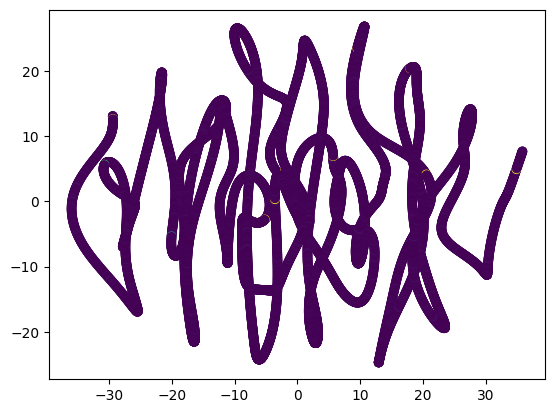

In [24]:
plt.scatter(x_tsne_rg[:,0], x_tsne_rg[:,1], c=y_rg)

In [25]:
tsne = TSNE(n_components=2)
x_tsne_cl = tsne.fit_transform(x_cl)

print(x_cl.shape, x_tsne_cl.shape)
test_cl(x_tsne_cl, y_cl)

(27368, 15) (27368, 2)
              precision    recall  f1-score   support

       False       0.69      0.69      0.69      5515
        True       0.68      0.69      0.69      5433

    accuracy                           0.69     10948
   macro avg       0.69      0.69      0.69     10948
weighted avg       0.69      0.69      0.69     10948



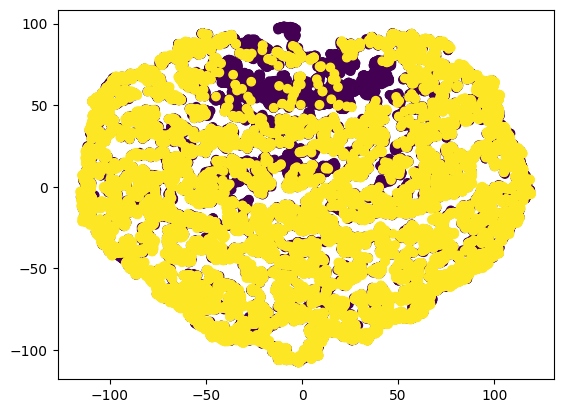

In [26]:
plt.scatter(x_tsne_cl[:,0], x_tsne_cl[:,1], c=y_cl)

## Isomap

In [28]:
isomap = Isomap(n_components=2)
x_ismp_rg = isomap.fit_transform(x_rg)

print(x_rg.shape, x_ismp_rg.shape)
test_rg(x_ismp_rg, y_rg)

(10000, 7) (10000, 2)
MAE:  803.0619333333333 MSE:  16839559.84512 RMSE:  4103.603275795554 MAPE:  1.265782552929766 R2:  -0.23452121544474291


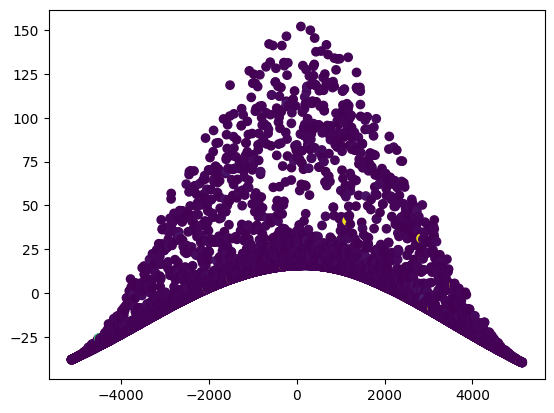

In [29]:
plt.scatter(x_ismp_rg[:,0], x_ismp_rg[:,1], c=y_rg)

In [42]:
x_cl1 = x_cl[:1000]
y_cl1 = y_cl[:1000]

In [43]:
isomap = Isomap(n_components=2)
x_ismp = isomap.fit_transform(x_cl1)

print(x_cl1.shape, x_ismp.shape)
test_cl(x_ismp, y_cl1)

(1000, 15) (1000, 2)
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       400

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



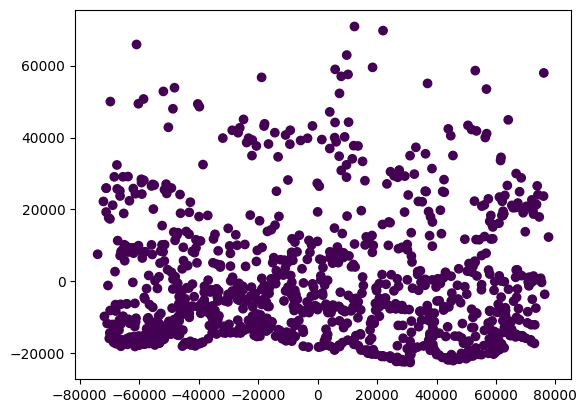

In [45]:
plt.scatter(x_ismp[:,0], x_ismp[:,1], c=y_cl1)